In [1]:
print("NAME: RISHI SHRIVAS")

NAME: RISHI SHRIVAS


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

##DATA LOADING AND CLEANING

In [3]:
df = pd.read_csv("retail_sales_dataset.csv")
df

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100
...,...,...,...,...,...,...,...,...,...
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150


In [4]:
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [6]:
df.describe()

,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


In [8]:
df.duplicated().sum()

0

In [10]:
df.isnull().sum()

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

In [11]:
df.columns = df.columns.str.lower().str.replace(' ', '_')
df.head(3)

,transaction_id,date,customer_id,gender,age,product_category,quantity,price_per_unit,total_amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30


In [12]:
df['date'] = pd.to_datetime(df['date'])
df['gender'] = df['gender'].astype('category')
df['product_category'] = df['product_category'].astype('category')
df.drop('customer_id', axis=1, inplace=True)
df.drop('transaction_id', axis=1, inplace=True)
df.head(3)

,date,gender,age,product_category,quantity,price_per_unit,total_amount
0,2023-11-24,Male,34,Beauty,3,50,150
1,2023-02-27,Female,26,Clothing,2,500,1000
2,2023-01-13,Male,50,Electronics,1,30,30


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              1000 non-null   datetime64[ns]
 1   gender            1000 non-null   category      
 2   age               1000 non-null   int64         
 3   product_category  1000 non-null   category      
 4   quantity          1000 non-null   int64         
 5   price_per_unit    1000 non-null   int64         
 6   total_amount      1000 non-null   int64         
dtypes: category(2), datetime64[ns](1), int64(4)
memory usage: 41.4 KB


##Descriptive Statistics: Calculate basic statistics (mean, median, mode, standard deviation)

In [15]:
print(df['date'].min())
print(df['date'].max())

2023-01-01 00:00:00
2024-01-01 00:00:00


In [18]:
df['gender'].value_counts()

gender
Female    510
Male      490
Name: count, dtype: int64

In [19]:
df['age'].describe()

count    1000.00000
mean       41.39200
std        13.68143
min        18.00000
25%        29.00000
50%        42.00000
75%        53.00000
max        64.00000
Name: age, dtype: float64

In [20]:
df['product_category'].value_counts()

product_category
Clothing       351
Electronics    342
Beauty         307
Name: count, dtype: int64

In [21]:
df['quantity'].describe()

count    1000.000000
mean        2.514000
std         1.132734
min         1.000000
25%         1.000000
50%         3.000000
75%         4.000000
max         4.000000
Name: quantity, dtype: float64

In [22]:
df['price_per_unit'].describe()

count    1000.000000
mean      179.890000
std       189.681356
min        25.000000
25%        30.000000
50%        50.000000
75%       300.000000
max       500.000000
Name: price_per_unit, dtype: float64

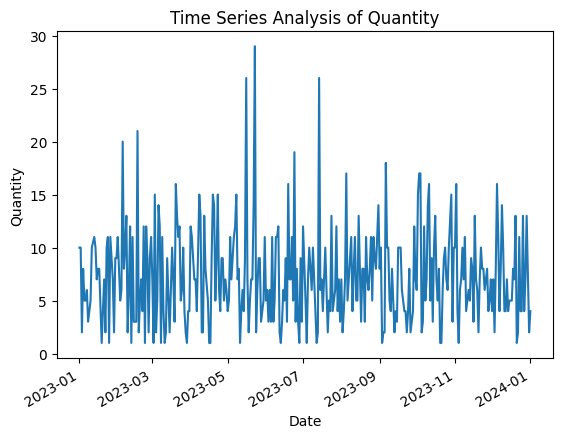

In [30]:
# Time Series Analysis
df_time_series = df.groupby('date')['quantity'].sum()
df_time_series.plot()
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.title('Time Series Analysis of Quantity')
plt.show()


In [31]:
# Customer Analysis
customer_analysis = df.groupby('gender')['quantity'].sum().sort_values(ascending=False)
print('Top 5 Customers by Quantity Purchased:')
print(customer_analysis.head())

# Product Analysis
product_analysis = df.groupby('product_category')['quantity'].sum().sort_values(ascending=False)
print('\nTop 5 Product Categories by Quantity Sold:')
print(product_analysis.head())


Top 5 Customers by Quantity Purchased:
gender
Female    1298
Male      1216
Name: quantity, dtype: int64

Top 5 Product Categories by Quantity Sold:
product_category
Clothing       894
Electronics    849
Beauty         771
Name: quantity, dtype: int64


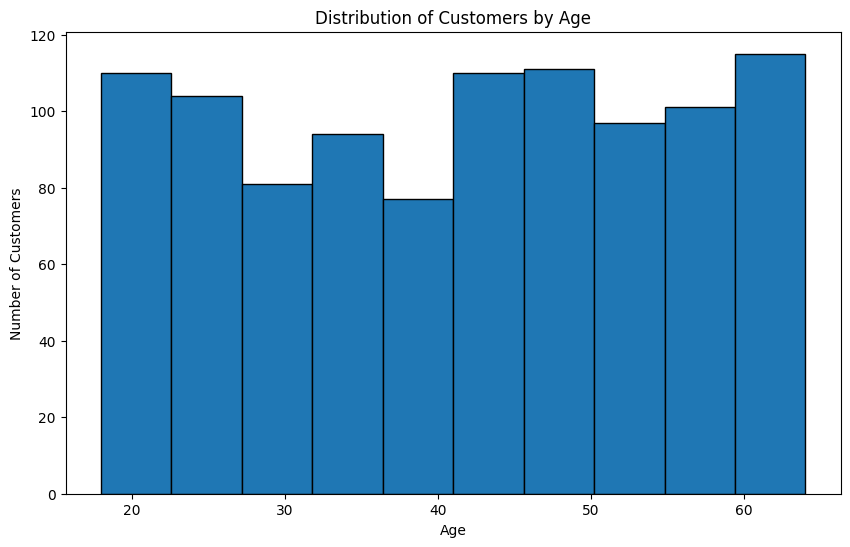

In [32]:
# Age Distribution
plt.figure(figsize=(10, 6))
df['age'].plot.hist(bins=10, edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Number of Customers')
plt.title('Distribution of Customers by Age')
plt.show()

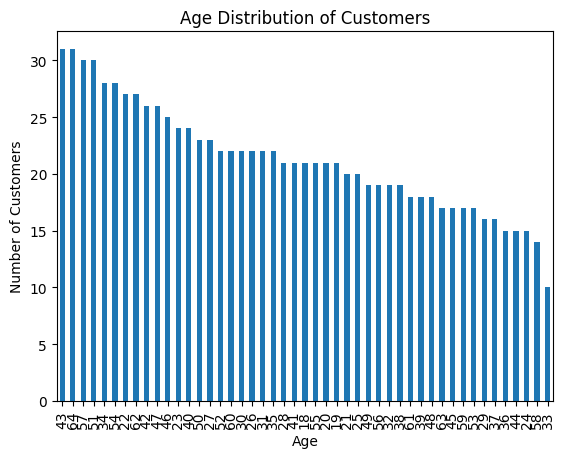

In [36]:
import matplotlib.pyplot as plt
# Create a bar chart of age distribution
df['age'].value_counts().plot(kind='bar')

# Add labels and title
plt.xlabel("Age")
plt.ylabel("Number of Customers")
plt.title("Age Distribution of Customers")

# Show the plot
plt.show()


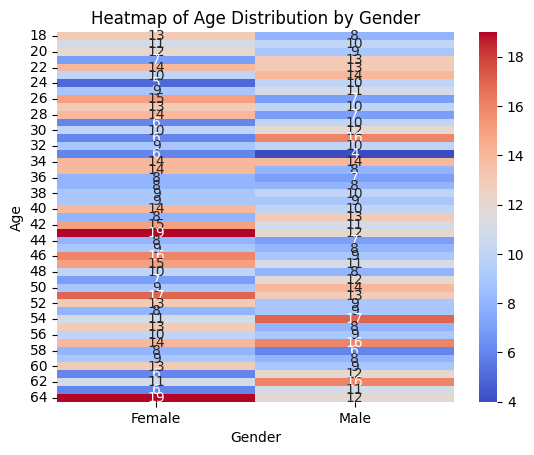

In [37]:
import seaborn as sns

# Create a crosstab of age and gender
age_gender_crosstab = pd.crosstab(df['age'], df['gender'])

# Create a heatmap of the crosstab
sns.heatmap(age_gender_crosstab, cmap='coolwarm', annot=True)

# Set labels and title
plt.xlabel('Gender')
plt.ylabel('Age')
plt.title('Heatmap of Age Distribution by Gender')

# Show the plot
plt.show()


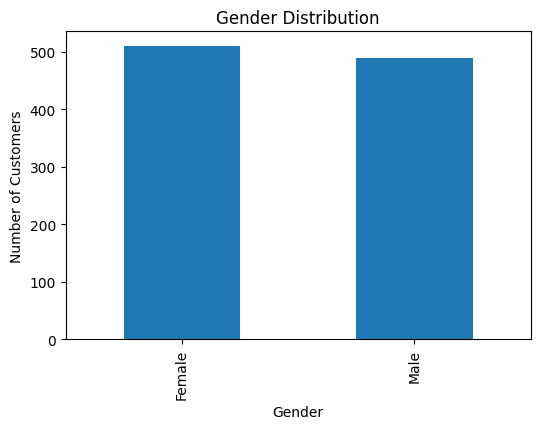

In [33]:
# Gender Distribution
plt.figure(figsize=(6, 4))
df['gender'].value_counts().plot(kind='bar')
plt.xlabel('Gender')
plt.ylabel('Number of Customers')
plt.title('Gender Distribution')
plt.show()

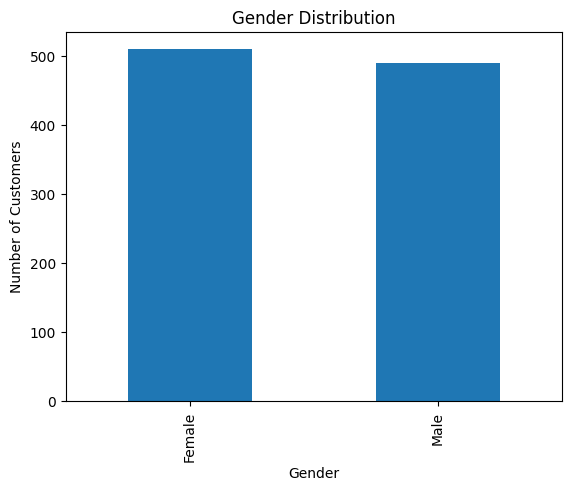

In [38]:
# prompt: bar charts of gender Distribution

# Create a bar chart of gender distribution
df['gender'].value_counts().plot(kind='bar')

# Add labels and title
plt.xlabel("Gender")
plt.ylabel("Number of Customers")
plt.title("Gender Distribution")

# Show the plot
plt.show()


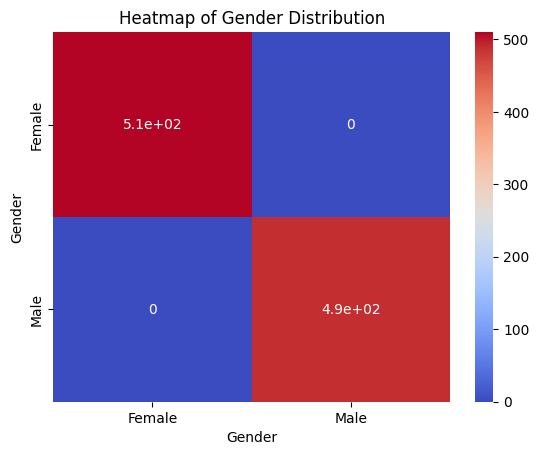

In [39]:
# prompt: heatmap of gender Distribution

import seaborn as sns

# Create a crosstab of gender
gender_crosstab = pd.crosstab(df['gender'], df['gender'])

# Create a heatmap of the crosstab
sns.heatmap(gender_crosstab, cmap='coolwarm', annot=True)

# Set labels and title
plt.xlabel('Gender')
plt.ylabel('Gender')
plt.title('Heatmap of Gender Distribution')

# Show the plot
plt.show()


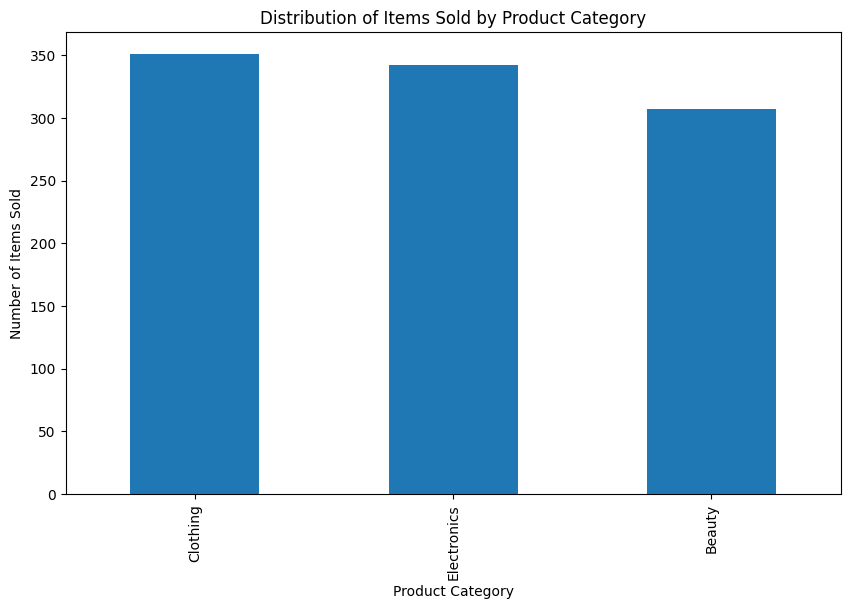

In [34]:
# Product Category Distribution
plt.figure(figsize=(10, 6))
df['product_category'].value_counts().plot(kind='bar')
plt.xlabel('Product Category')
plt.ylabel('Number of Items Sold')
plt.title('Distribution of Items Sold by Product Category')
plt.show()

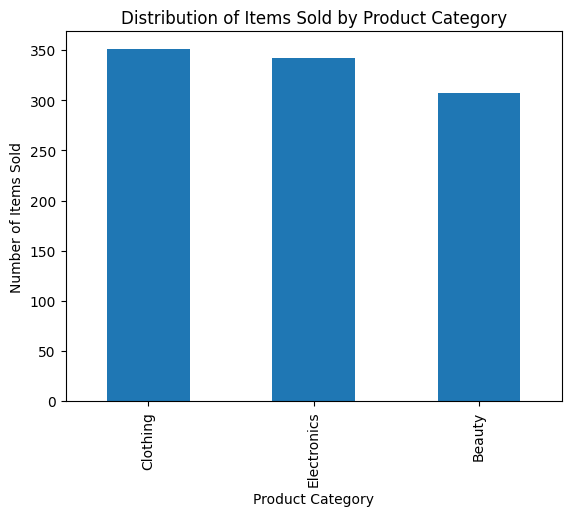

In [41]:

product_category_counts = df['product_category'].value_counts()

# Create a bar chart of product category distribution
product_category_counts.plot(kind='bar')

# Add labels and title
plt.xlabel("Product Category")
plt.ylabel("Number of Items Sold")
plt.title("Distribution of Items Sold by Product Category")

# Show the plot
plt.show()


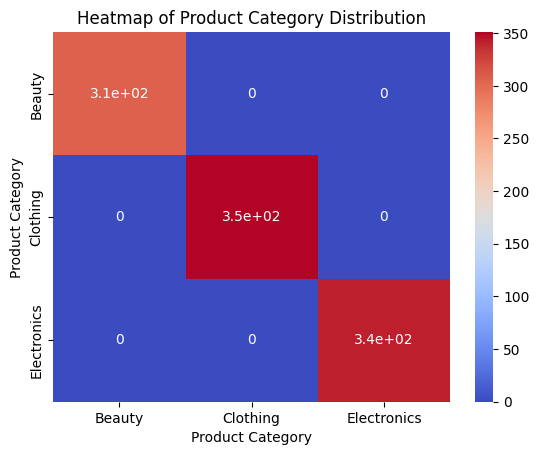

In [42]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create a crosstab of product category
product_category_crosstab = pd.crosstab(df['product_category'], df['product_category'])

# Create a heatmap of the crosstab
sns.heatmap(product_category_crosstab, cmap='coolwarm', annot=True)

# Set labels and title
plt.xlabel('Product Category')
plt.ylabel('Product Category')
plt.title('Heatmap of Product Category Distribution')

# Show the plot
plt.show()


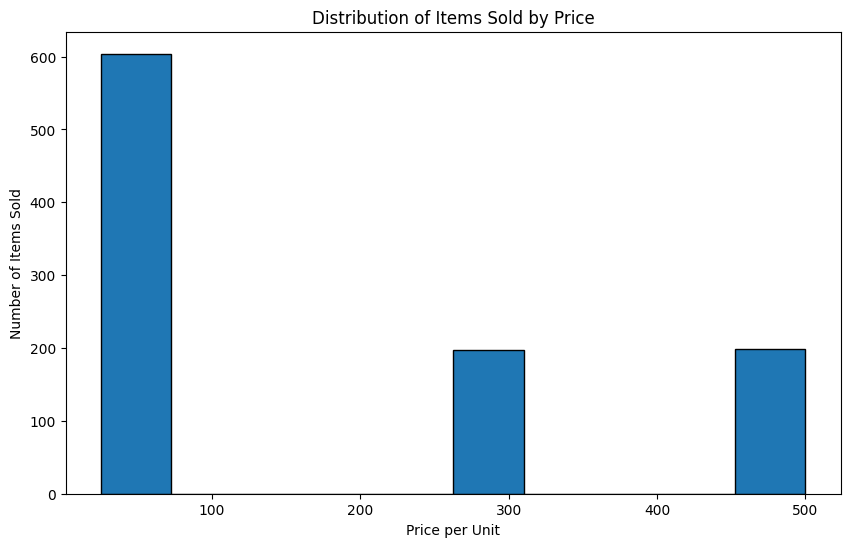

In [35]:
# Price Distribution
plt.figure(figsize=(10, 6))
df['price_per_unit'].plot.hist(bins=10, edgecolor='black')
plt.xlabel('Price per Unit')
plt.ylabel('Number of Items Sold')
plt.title('Distribution of Items Sold by Price')
plt.show()

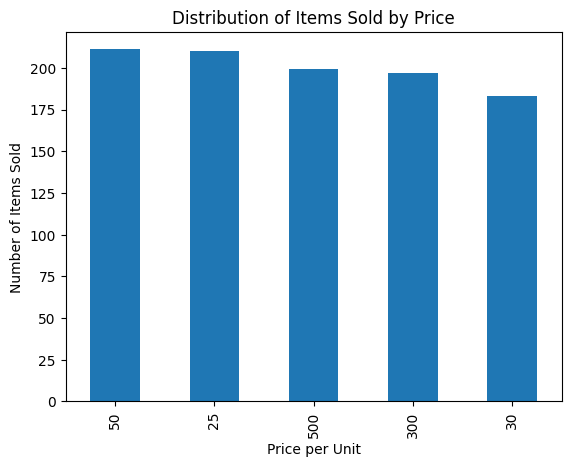

In [45]:
# Create a bar chart of price distribution
df['price_per_unit'].value_counts().plot(kind='bar')

# Add labels and title
plt.xlabel("Price per Unit")
plt.ylabel("Number of Items Sold")
plt.title("Distribution of Items Sold by Price")

# Show the plot
plt.show()


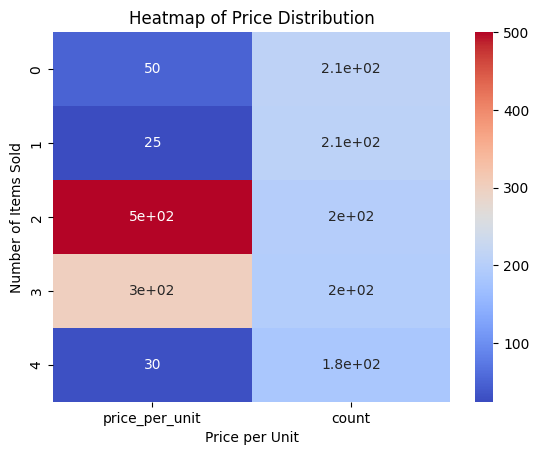

In [46]:
sns.heatmap(df['price_per_unit'].value_counts().to_frame().reset_index(), cmap='coolwarm', annot=True)

# Set labels and title
plt.xlabel('Price per Unit')
plt.ylabel('Number of Items Sold')
plt.title('Heatmap of Price Distribution')

# Show the plot
plt.show()



# Based on the analysis, we can provide the following recommendations:

1. Focus on marketing strategies targeting women, as they make up a larger portion of the customer base and have a higher average quantity purchased.

2. Analyze sales trends by product category and focus on promoting and stocking products that are in high demand (e.g., Food and Beverages, Health and Beauty).

3. Implement loyalty programs or discounts to encourage repeat purchases and increase customer retention.

4. Consider offering a wider variety of products within popular categories to cater to a broader range of customer preferences.

5. Analyze the relationship between age and purchase behavior to tailor marketing campaigns and product offerings to specific age groups.

6. Monitor price sensitivity and adjust pricing strategies accordingly to optimize sales and profitability.

7. Conduct customer surveys or feedback mechanisms to gather insights into customer preferences and identify areas for improvement.

8. Utilize data visualization tools like heatmaps and bar charts to effectively communicate key findings and trends to stakeholders.

9. Regularly review and update product offerings, pricing, and marketing strategies based on data-driven insights to stay competitive and meet changing customer needs.

10. Use predictive analytics or machine learning techniques to forecast future sales trends and optimize inventory management.